# Proyecto Final - Introduccion a la ciencia de datos
* Alejandro Marin Hoyos
* Manuel Antonio Vidales
* Yessica Fernanda Villa  
### 3. Modelado de Datos

In [3]:
!pip install plotly.express

Defaulting to user installation because normal site-packages is not writeable
  Using cached plotly_express-0.4.1-py2.py3-none-any.whl.metadata (1.7 kB)
  Using cached statsmodels-0.14.4-cp312-cp312-win_amd64.whl.metadata (9.5 kB)
Using cached plotly_express-0.4.1-py2.py3-none-any.whl (2.9 kB)
Using cached statsmodels-0.14.4-cp312-cp312-win_amd64.whl (9.8 MB)



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px



## Carga del dataset

In [5]:
# Cargar datos normalizados (ya estandarizados)
df = pd.read_csv('crop_data_normalized.csv')

## Calcular "facilidad" de cultivo (inversa de la desviación estándar por cultivo)

In [6]:
cultivos = df.groupby('label').std().mean(axis=1).sort_values()
cultivos_faciles = cultivos.head(10)  # Los 5 cultivos con condiciones más estables
print("Cultivos más fáciles de sembrar (según estabilidad de condiciones):")
print(cultivos_faciles)

Cultivos más fáciles de sembrar (según estabilidad de condiciones):
label
muskmelon      0.171264
apple          0.191376
watermelon     0.200664
mungbean       0.200988
banana         0.218563
blackgram      0.262412
kidneybeans    0.265448
pomegranate    0.268062
jute           0.273375
coconut        0.276262
dtype: float64


## histogramas para cada característica

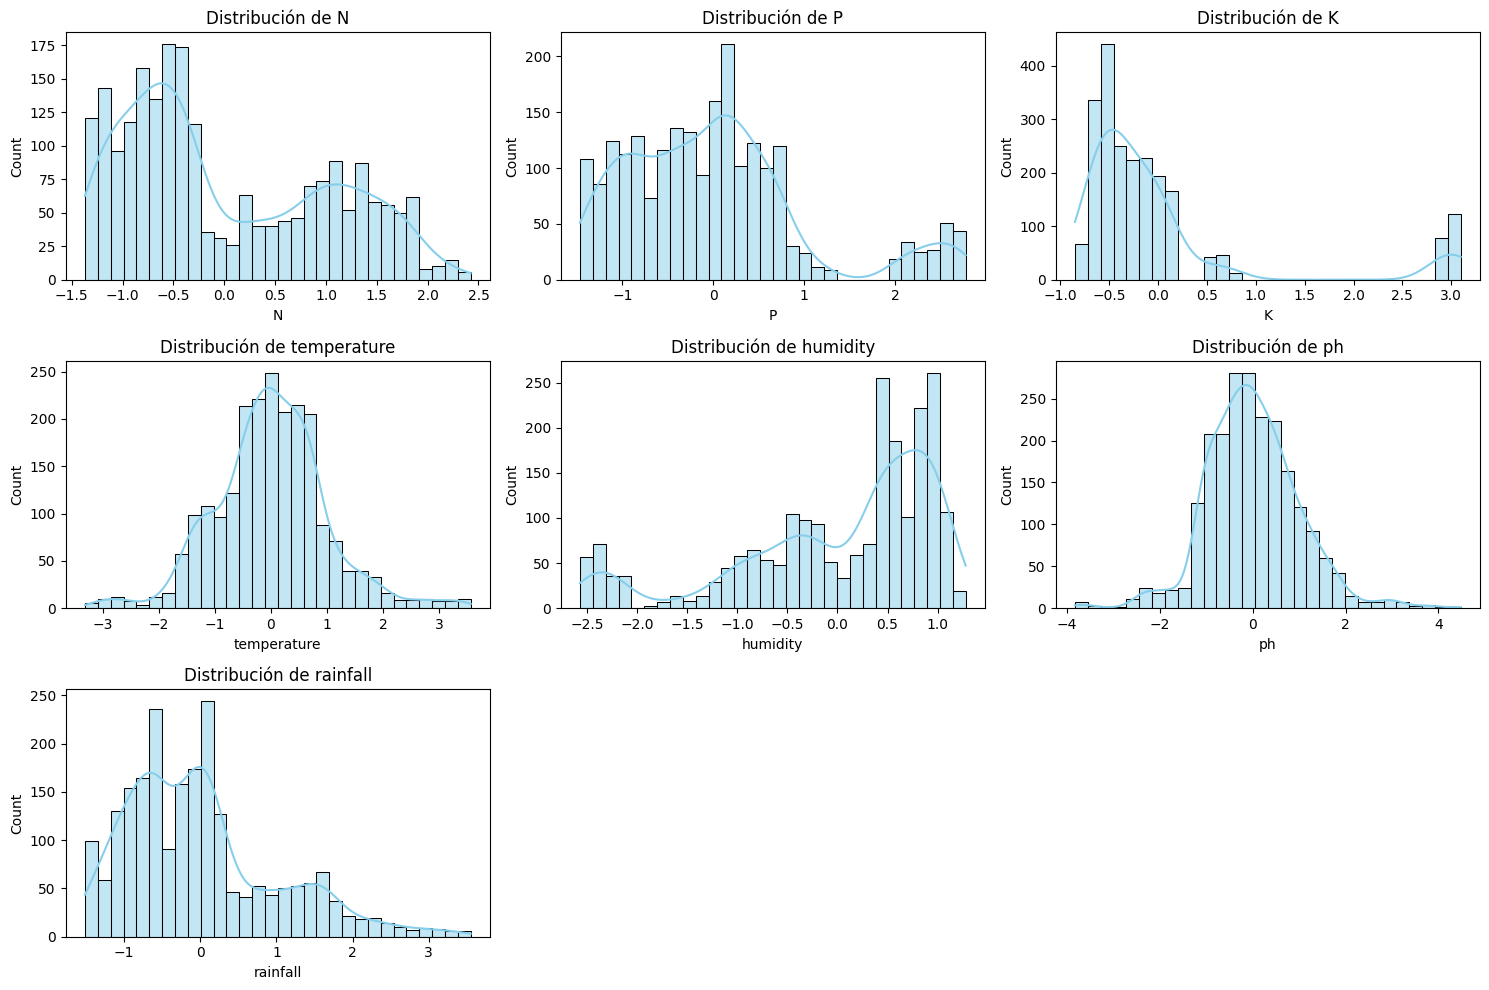

In [31]:
# Definir las columnas numéricas a graficar
numerical_columns = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

plt.figure(figsize=(15, 10))
# Graficar un histograma para cada característica numérica
for i, col in enumerate(numerical_columns):
    plt.subplot(3, 3, i+1)
    sns.histplot(df[col], kde=True, color='skyblue', bins=30)
    plt.title(f'Distribución de {col}')
plt.tight_layout()
plt.show()

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [23]:
from sklearn.metrics import accuracy_score


🔹 Random Forest
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        14
      papa

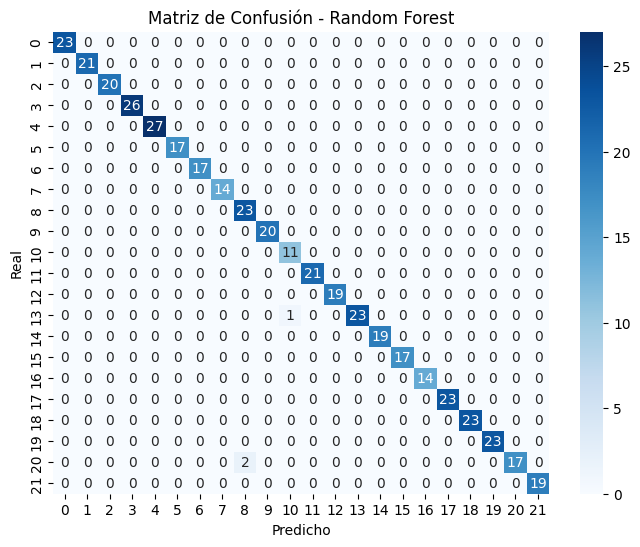

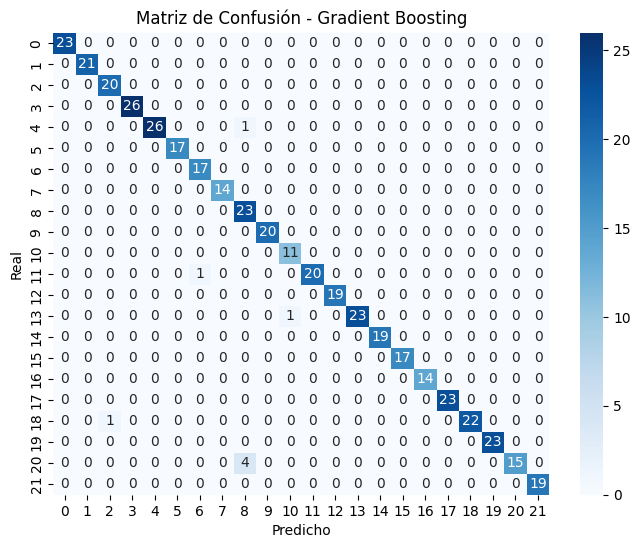

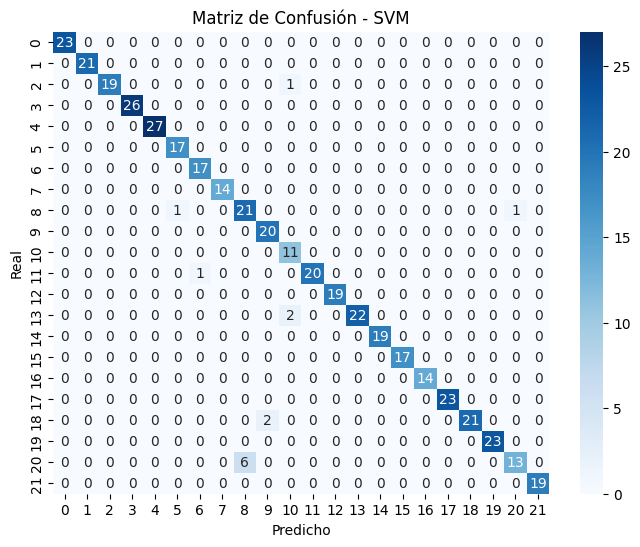

🔹 Random Forest Accuracy: 0.9932
🔹 Gradient Boosting Accuracy: 0.9818
🔹 SVM Accuracy: 0.9682


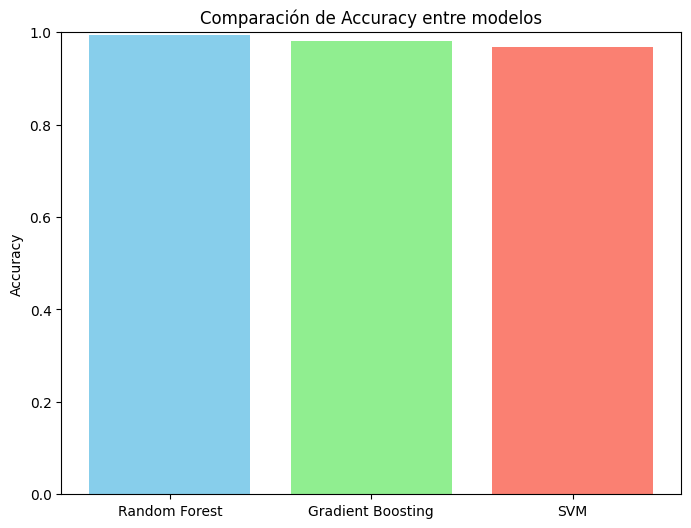

In [29]:
# Importar librerías necesarias
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# =============================
# 1️⃣  Preparar datos
# =============================

# Asegúrate de tener tu DataFrame 'df'
# Separar features y etiqueta
X = df.drop('label', axis=1)
y = df['label']

# Dividir conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# =============================
# 2️⃣  Definir y entrenar modelos
# =============================

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

# SVM
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

# =============================
# 3️⃣  Reporte de clasificación
# =============================

print("\n🔹 Random Forest")
print(classification_report(y_test, y_pred_rf))

print("\n🔹 Gradient Boosting")
print(classification_report(y_test, y_pred_gb))

print("\n🔹 SVM")
print(classification_report(y_test, y_pred_svm))

# =============================
# 4️⃣  Matrices de Confusión
# =============================

def plot_confusion(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Matriz de Confusión - {title}')
    plt.xlabel('Predicho')
    plt.ylabel('Real')
    plt.show()

plot_confusion(y_test, y_pred_rf, 'Random Forest')
plot_confusion(y_test, y_pred_gb, 'Gradient Boosting')
plot_confusion(y_test, y_pred_svm, 'SVM')
# =============================
# 5️⃣  Calcular y mostrar accuracy    

# Calcular accuracy para cada modelo
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

# Imprimir resultados
print(f"🔹 Random Forest Accuracy: {accuracy_rf:.4f}")
print(f"🔹 Gradient Boosting Accuracy: {accuracy_gb:.4f}")
print(f"🔹 SVM Accuracy: {accuracy_svm:.4f}")

# (Opcional) Mostrar en gráfico de barras
import matplotlib.pyplot as plt

models = ['Random Forest', 'Gradient Boosting', 'SVM']
accuracies = [accuracy_rf, accuracy_gb, accuracy_svm]

plt.figure(figsize=(8,6))
plt.bar(models, accuracies, color=['skyblue', 'lightgreen', 'salmon'])
plt.ylim(0, 1)
plt.title('Comparación de Accuracy entre modelos')
plt.ylabel('Accuracy')
plt.show()

In [30]:
# 1. Calcular condiciones medias (medianas)
condiciones_medias = X.median().to_frame().T

# 2. Predecir con Random Forest
cultivo_rf = rf_model.predict(condiciones_medias)[0]
print(f"Cultivo recomendado por Random Forest: {cultivo_rf}")

# 3. Predecir con Gradient Boosting
cultivo_gb = gb_model.predict(condiciones_medias)[0]
print(f"Cultivo recomendado por Gradient Boosting: {cultivo_gb}")

# 4. Predecir con SVM
cultivo_svm = svm_model.predict(condiciones_medias)[0]
print(f"Cultivo recomendado por SVM: {cultivo_svm}")

Cultivo recomendado por Random Forest: papaya
Cultivo recomendado por Gradient Boosting: jute
Cultivo recomendado por SVM: maize


C:\Users\USUARIO\AppData\Local\Temp\ipykernel_3648\1761971924.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rf_importances, y=X.columns, palette='rocket', ax=axes[0])
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_3648\1761971924.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gb_importances, y=X.columns, palette='viridis', ax=axes[1])


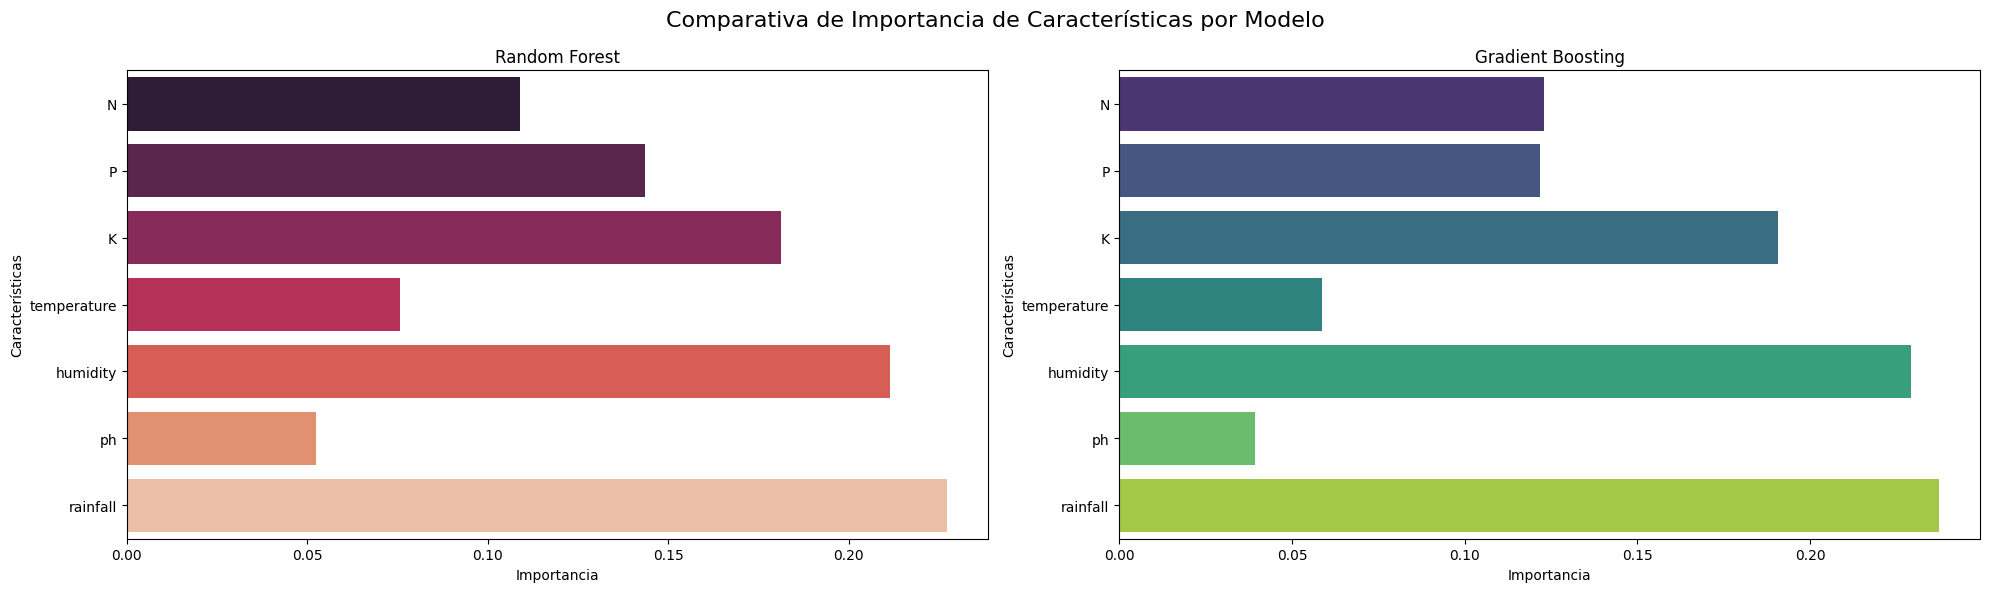

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Preparar figura con 3 subplots horizontales
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# --- Random Forest ---
rf_importances = rf_model.feature_importances_
sns.barplot(x=rf_importances, y=X.columns, palette='rocket', ax=axes[0])
axes[0].set_title('Random Forest')
axes[0].set_xlabel('Importancia')
axes[0].set_ylabel('Características')

# --- Gradient Boosting ---
gb_importances = gb_model.feature_importances_
sns.barplot(x=gb_importances, y=X.columns, palette='viridis', ax=axes[1])
axes[1].set_title('Gradient Boosting')
axes[1].set_xlabel('Importancia')
axes[1].set_ylabel('Características')


plt.suptitle('Comparativa de Importancia de Características por Modelo', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 1])
plt.show()


##  Modelado para predecir el cultivo recomendado

In [8]:
X = df.drop('label', axis=1)
y = df['label']

# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar modelo (RandomForest es robusto a outliers y multiclase)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluar
y_pred = model.predict(X_test)
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))


Reporte de clasificación:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        14


## Calcula la mediana de cada variable (representa condiciones típicas sin extremos)

In [9]:
# Predecir con condiciones medias
cultivo = model.predict(X.median().to_frame().T)[0]
print(f"Cultivo recomendado para condiciones estables: {cultivo}")

Cultivo recomendado para condiciones estables: papaya


## Cultivo (Desviación Promedio por Cultivo)

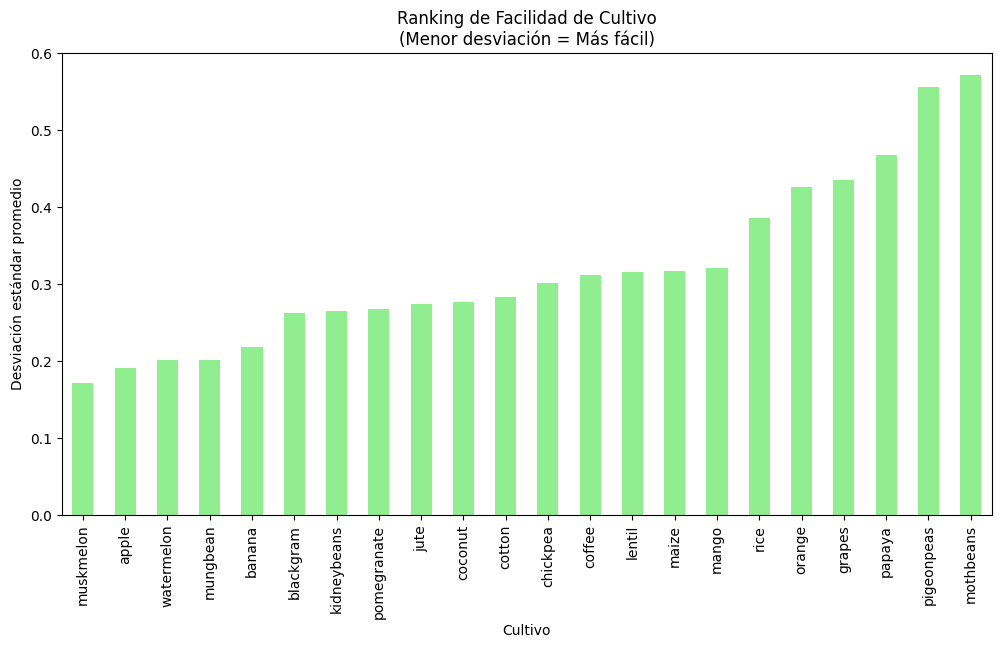

In [10]:
# Calcular y graficar facilidad
cultivos_facilidad = df.groupby('label').std().mean(axis=1).sort_values()
plt.figure(figsize=(12, 6))
cultivos_facilidad.plot(kind='bar', color='lightgreen')
plt.title('Ranking de Facilidad de Cultivo\n(Menor desviación = Más fácil)')
plt.xlabel('Cultivo')
plt.ylabel('Desviación estándar promedio')
plt.xticks(rotation=90)
plt.show()

## Importancia de Características (RandomForest)

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_3648\685306287.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importancias, y=features, palette='rocket')


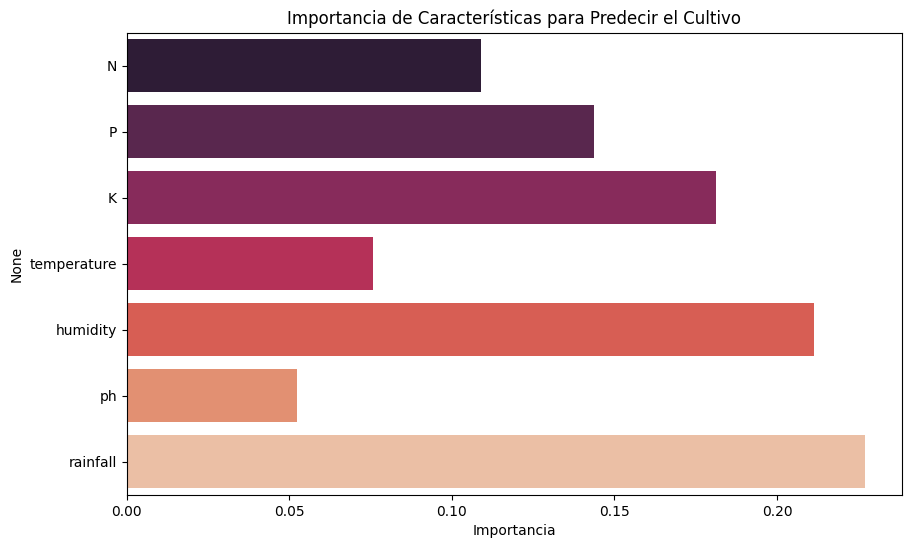

In [11]:
# Graficar importancia de variables
importancias = model.feature_importances_
features = X.columns
plt.figure(figsize=(10, 6))
sns.barplot(x=importancias, y=features, palette='rocket')
plt.title('Importancia de Características para Predecir el Cultivo')
plt.xlabel('Importancia')
plt.show()

## Matriz de Confusión - Predicción de Cultivos

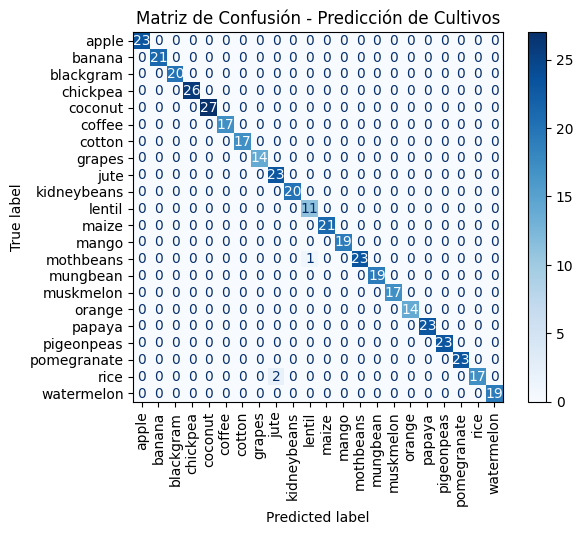

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues', xticks_rotation=90)
plt.title('Matriz de Confusión - Predicción de Cultivos')
plt.show()

## Boxplots por Cultivo (Variables Clave)

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_3648\2366571886.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='label', y=col, ax=axes[i], palette='viridis')
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_3648\2366571886.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_3648\2366571886.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='label', y=col, ax=axes[i], palette='viridis')
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_3648\2366571886.py:11: UserWarning: set_tickl

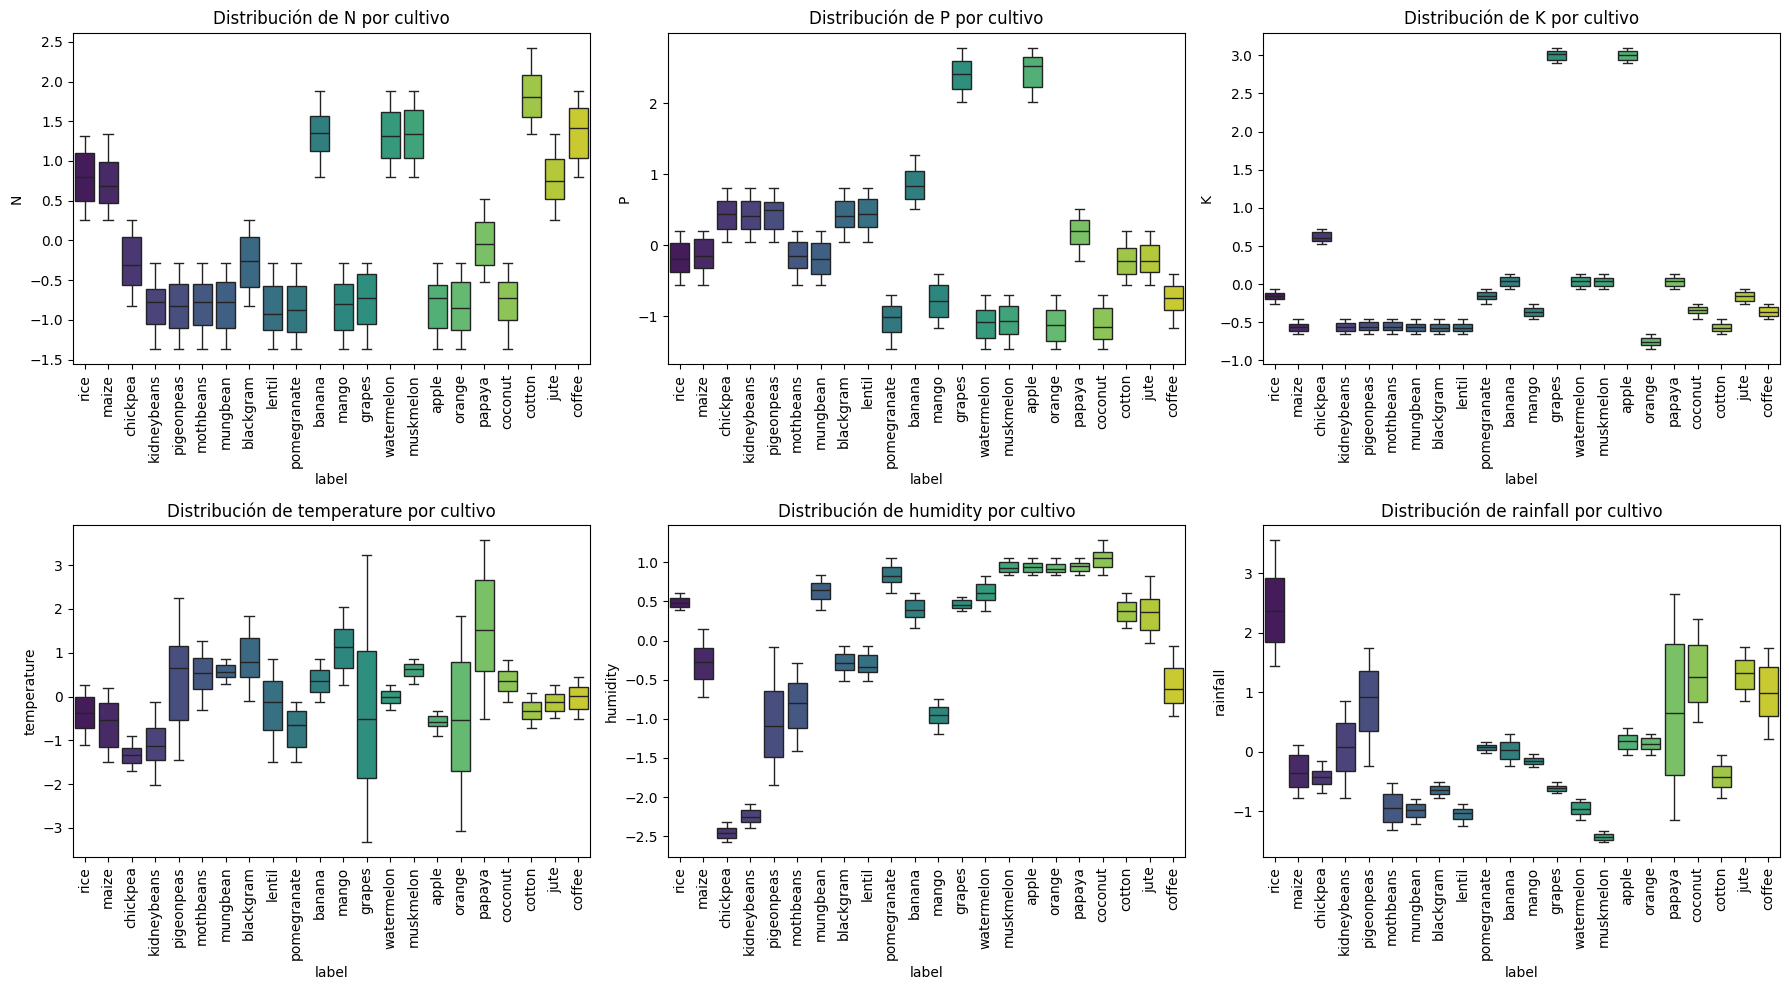

In [13]:
# Variables a comparar
variables = ['N', 'P', 'K', 'temperature', 'humidity', 'rainfall']

# Crear subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for i, col in enumerate(variables):
    sns.boxplot(data=df, x='label', y=col, ax=axes[i], palette='viridis')
    axes[i].set_title(f'Distribución de {col} por cultivo')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()

 ## Heatmap de Condiciones Promedio

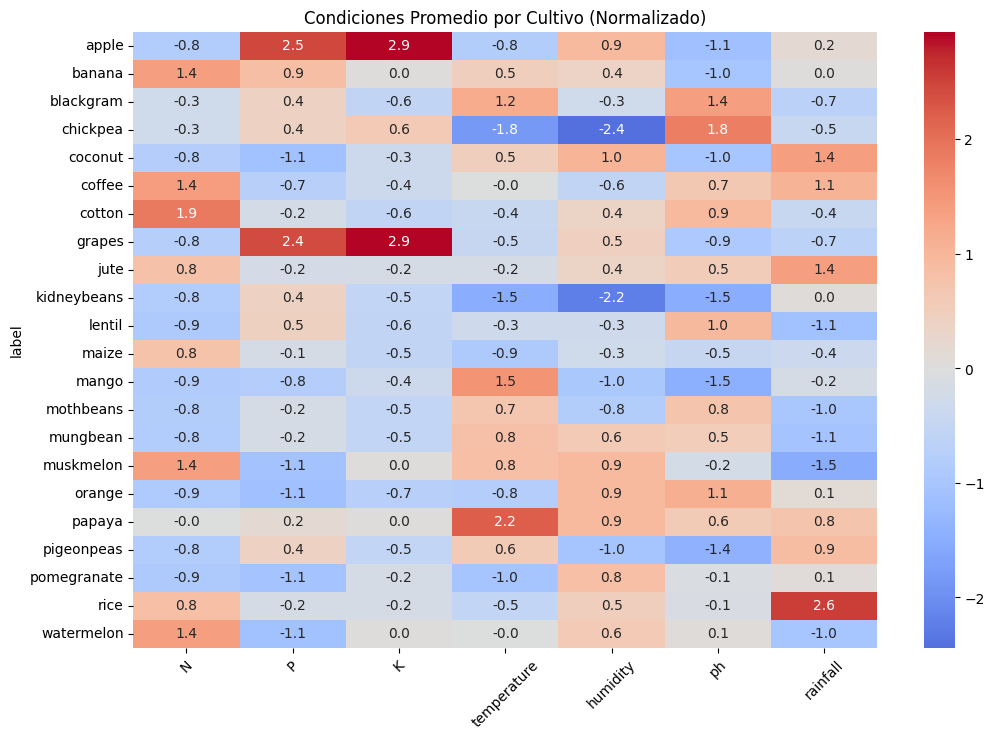

In [14]:
# Calcular media por cultivo y variable
df_mean = df.groupby('label', as_index=False)[numerical_columns].mean()
heatmap_data = df_mean.set_index('label')[numerical_columns]

# Normalizar entre -1 y 1 para mejor visualización
normalized_data = (heatmap_data - heatmap_data.mean()) / heatmap_data.std()

plt.figure(figsize=(12, 8))
sns.heatmap(normalized_data, cmap='coolwarm', center=0, annot=True, fmt='.1f')
plt.title('Condiciones Promedio por Cultivo (Normalizado)')
plt.xticks(rotation=45)
plt.show()